In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:

# deeponet_a = pd.read_csv('data_plot/deeponet_A_s.csv').values
# deeponet_b = pd.read_csv('data_plot/deeponet_B_s.csv').values
# deeponet_c = pd.read_csv('data_plot/deeponet_C_s.csv').values


deeponet_c = pd.read_csv('unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv').values


lstm_c = pd.read_csv('unified_ablation_lstm_logminmax_y/baseline_pgd_0.1y_0.05_0.0125_50/models/lstm/1205_030530/predictions/metric/metrics.csv').values

deeponet_c_cleaned = np.nan_to_num(deeponet_c, nan=np.nan)
lstm_c_cleaned = np.nan_to_num(lstm_c, nan=np.nan)

# 检查形状是否匹配
if deeponet_c.shape != lstm_c.shape:
    print("两个文件的形状不同，无法逐元素对应。")
else:
    # 创建布尔矩阵来标记非 NaN 值的位置
    deeponet_non_nan = ~np.isnan(deeponet_c)
    lstm_non_nan = ~np.isnan(lstm_c)

    # 检查两个布尔矩阵是否完全一致
    matching = np.equal(deeponet_non_nan, lstm_non_nan)

    if np.all(matching):
        print("所有位置的元素对应情况一致（要么都有值，要么都为 NaN）。")
    else:
        # 找出不匹配的索引位置
        mismatch_indices = np.argwhere(~matching)
        print("以下位置的元素存在不一致情况（一个有值，一个为 NaN）：")
        for index in mismatch_indices:
            print(f"位置 {tuple(index)} - Deeponet: {'有值' if deeponet_non_nan[tuple(index)] else 'NaN'}, LSTM: {'有值' if lstm_non_nan[tuple(index)] else 'NaN'}")


deeponet_kge_index = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]
deeponet_pbias_index = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59]
deeponet_r2_index = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]

lstm_kge_index = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]
lstm_pbias_index = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59]
lstm_r2_index = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]

# deeponet

deeponet_c_kge, deeponet_c_r2, deeponet_c_pbias = deeponet_c[:, deeponet_kge_index], deeponet_c[:, deeponet_r2_index], deeponet_c[:, deeponet_pbias_index]

# lstm 
lstm_c_kge, lstm_c_r2, lstm_c_pbias = lstm_c[:, lstm_kge_index], lstm_c[:, lstm_r2_index], lstm_c[:, lstm_pbias_index]


所有位置的元素对应情况一致（要么都有值，要么都为 NaN）。


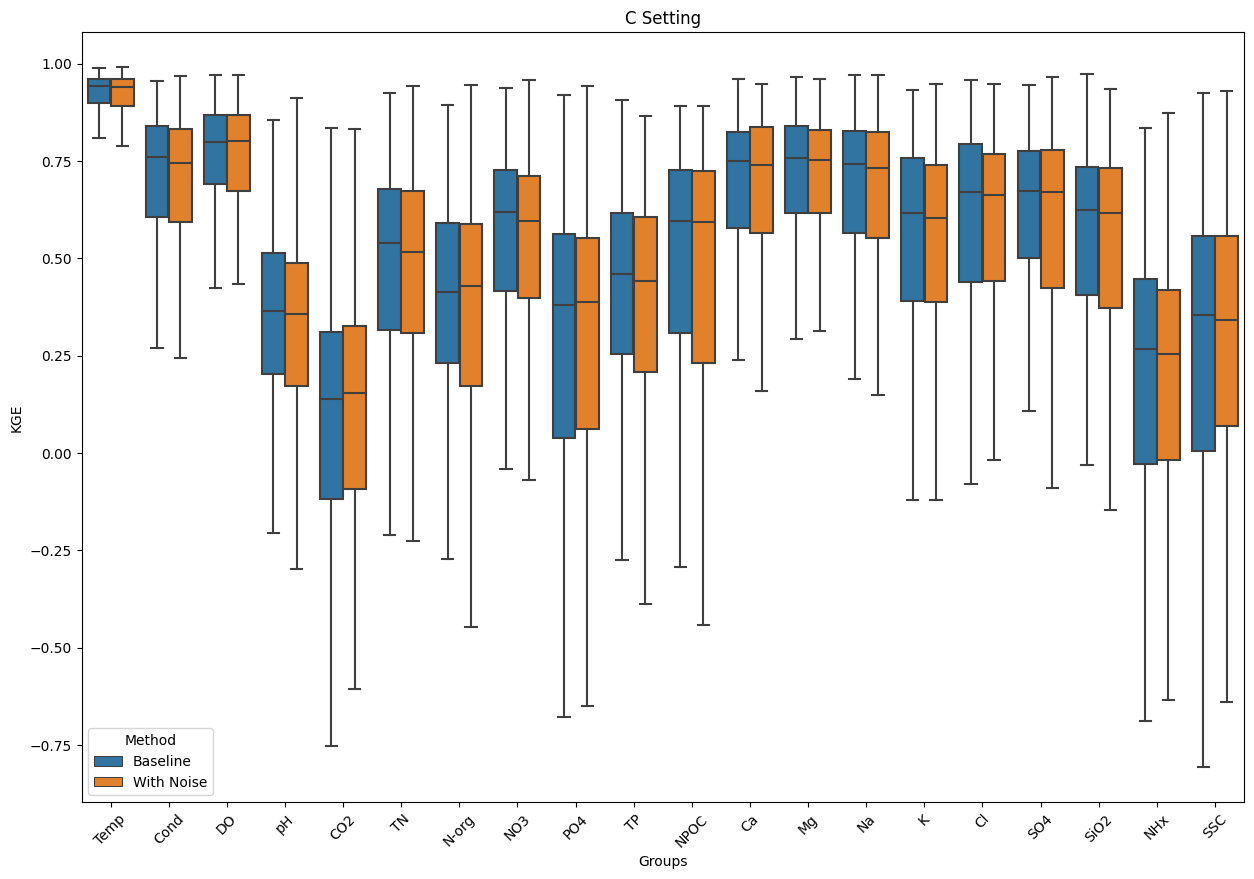

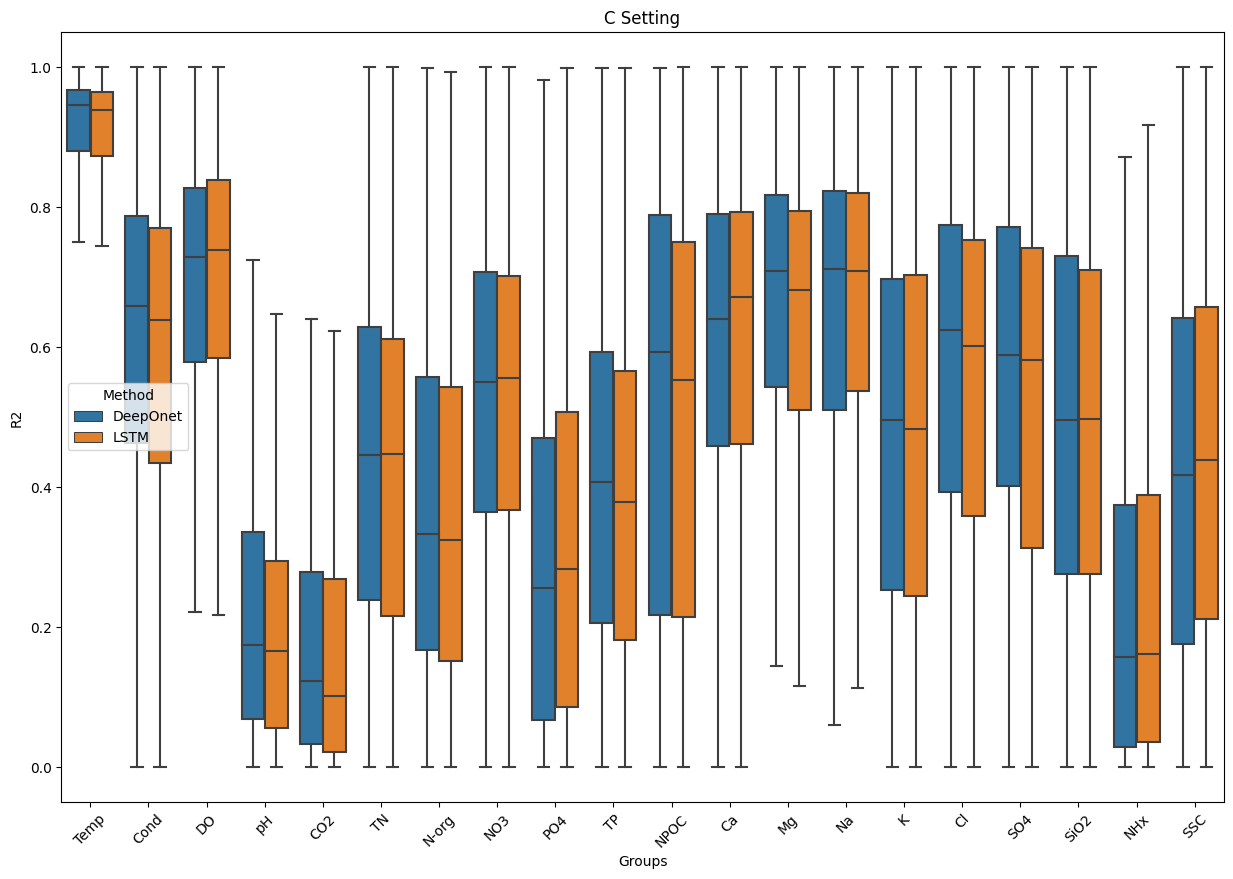

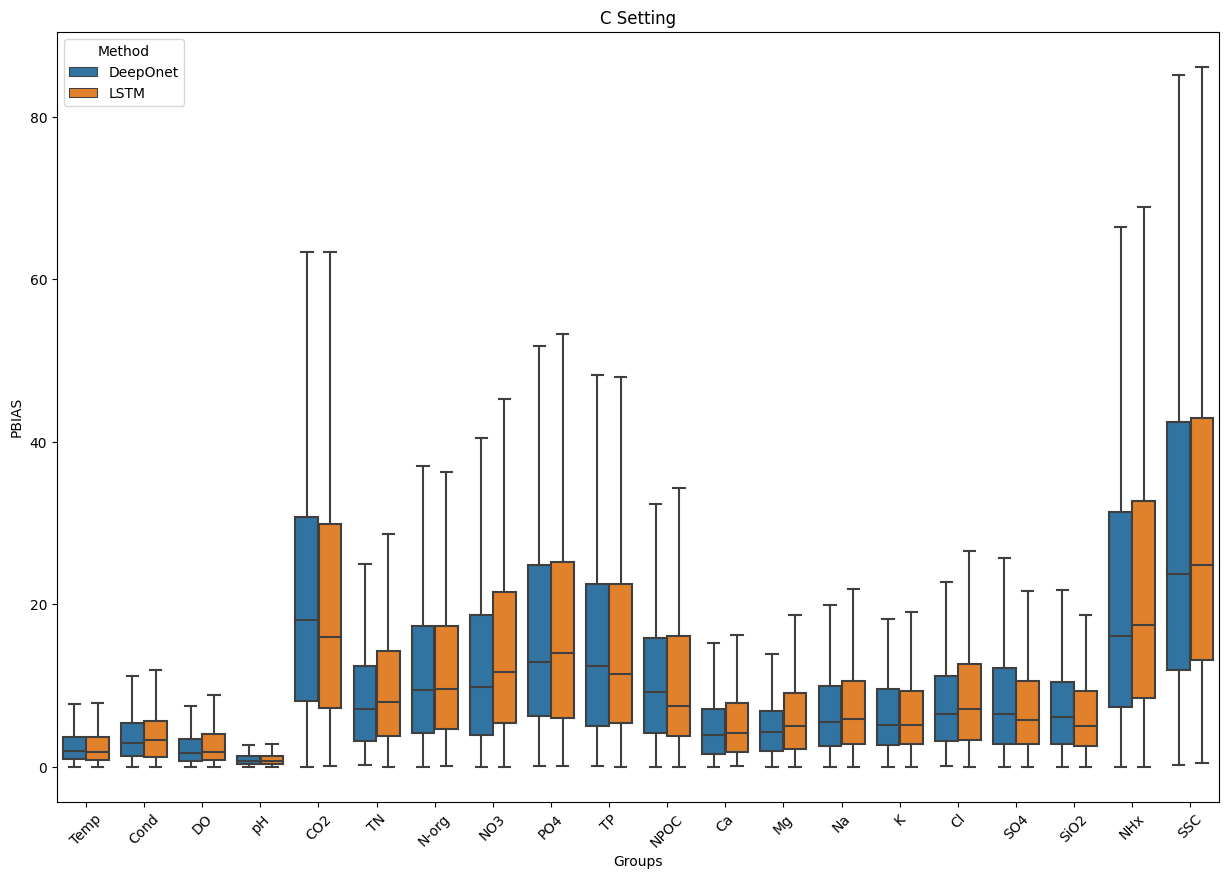

In [8]:
# KGE
df1 = pd.DataFrame(deeponet_c_kge, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df1['Dataset'] = 'Baseline'
df2 = pd.DataFrame(lstm_c_kge, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df2['Dataset'] = 'With Noise'
# 合并两个DataFrame
df_combined = pd.concat([df1, df2])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('C Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('KGE')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures/KGE_C.png', bbox_inches='tight')
plt.show()

# R2

df1 = pd.DataFrame(deeponet_c_r2, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_c_r2, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df2['Dataset'] = 'LSTM'


# 合并两个DataFrame
df_combined = pd.concat([df1, df2])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('C Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures/R2_C.png', bbox_inches='tight')
plt.show()

# PBIAS

df1 = pd.DataFrame(deeponet_c_pbias, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_c_pbias, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df2['Dataset'] = 'LSTM'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('C Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('PBIAS')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures/PBIAS_C.png', bbox_inches='tight')
plt.show()




Group: Temp
Filtered Baseline data:
0      0.942230
1      0.884555
2      0.978690
3      0.956964
4      0.959380
         ...   
477   -0.447780
478    0.834065
479   -0.114418
480    0.909643
481    0.773008
Name: Baseline, Length: 447, dtype: float64
Filtered With Noise data:
0      0.966601
1      0.858442
2      0.961547
3      0.976208
4      0.966511
         ...   
477    0.949289
478    0.779667
479    0.540038
480    0.931385
481    0.779182
Name: With Noise, Length: 447, dtype: float64
Number of non-NaN pairs: 447

Group: Cond
Filtered Baseline data:
0      0.329027
1      0.413595
2      0.891378
3      0.751156
4      0.828489
         ...   
474    0.763722
478    0.722677
479    0.768180
480    0.833219
481    0.677909
Name: Baseline, Length: 423, dtype: float64
Filtered With Noise data:
0      0.593185
1      0.541106
2      0.680568
3      0.854716
4      0.827865
         ...   
474    0.818760
478    0.545897
479    0.763373
480    0.827159
481    0.703613
Name: W

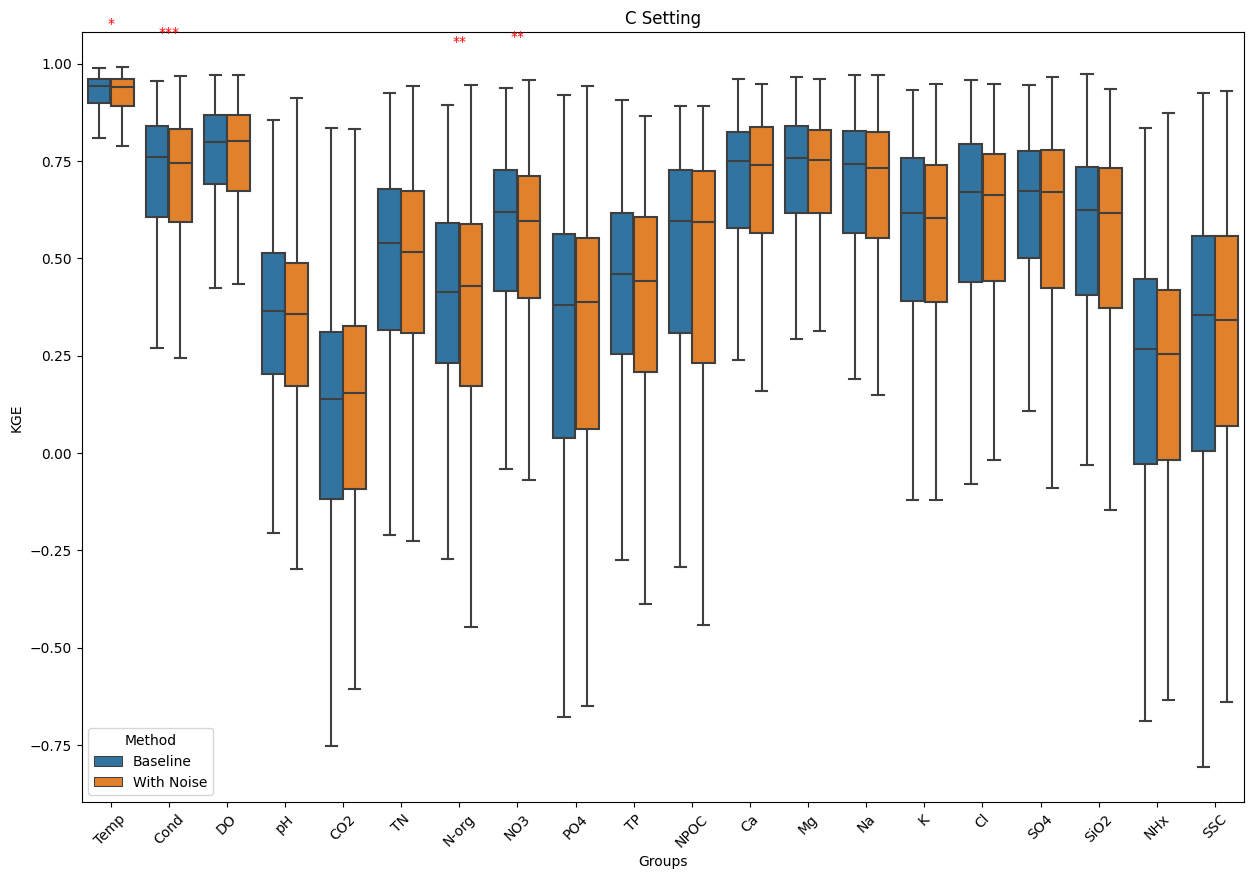

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 创建数据集
df1 = pd.DataFrame(deeponet_c_kge, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df1['Dataset'] = 'Baseline'
df2 = pd.DataFrame(lstm_c_kge, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df2['Dataset'] = 'With Noise'

# 合并两个 DataFrame
df_combined = pd.concat([df1, df2])

# 转换为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 初始化绘图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('C Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('KGE')
plt.xticks(rotation=45)
plt.legend(title='Method')

# 计算显著性检验并添加显著性标注
unique_groups = df_melted['Group'].unique()
y_offset = 0.1  # 用于控制显著性标注的高度偏移

for i, group in enumerate(unique_groups):
    # 获取 Baseline 和 With Noise 数据
    baseline_data = df_melted[(df_melted['Group'] == group) & (df_melted['Dataset'] == 'Baseline')]['Value']
    with_noise_data = df_melted[(df_melted['Group'] == group) & (df_melted['Dataset'] == 'With Noise')]['Value']
    
    # 组合成 DataFrame 并筛选非 NaN 成对数据
    combined_data = pd.DataFrame({'Baseline': baseline_data.values, 'With Noise': with_noise_data.values}).dropna()
    baseline_non_nan = combined_data['Baseline']
    with_noise_non_nan = combined_data['With Noise']
    
    # 打印调试信息，检查筛选后的数据
    print(f"\nGroup: {group}")
    print(f"Filtered Baseline data:\n{baseline_non_nan}")
    print(f"Filtered With Noise data:\n{with_noise_non_nan}")
    print(f"Number of non-NaN pairs: {len(baseline_non_nan)}")

    # 确保筛选后数据对不为空
    if len(baseline_non_nan) > 1 and len(with_noise_non_nan) > 1:
        # 使用 Wilcoxon 检验
        _, p_value = stats.wilcoxon(baseline_non_nan, with_noise_non_nan, alternative='greater')
        
        # 设置显著性标记
        significance = '***' if p_value <= 0.001 else '**' if p_value <= 0.01 else '*' if p_value <= 0.05 else ''

        # 计算位置并添加显著性标注
        x_position = i
        y_position = max(np.max(baseline_non_nan), np.max(with_noise_non_nan)) + y_offset
        plt.text(x_position, y_position, significance, ha='center', color='red')
    else:
        # 数据不足时显示“无数据”标记
        plt.text(i, max(df_melted['Value'].dropna()) + y_offset, 'No Data', ha='center', color='gray')

plt.savefig('figures/KGE_C_with_significance.png', bbox_inches='tight')
plt.show()
